In [2]:
from sklearn import datasets
import numpy as np
import matplotlib as plt
from pylab import *
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
iris = datasets.load_iris()

In [4]:
X1_name = 'sepal length (cm)'
X2_name = 'sepal width (cm)'
X3_name = 'petal length (cm)'
X4_name = 'petal width (cm)'

In [5]:
X = iris.data[:,1:3]
y = iris.target

In [6]:
labels={}

for code, name in enumerate(iris.target_names):
    labels[code]=name

labels

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
train = xgb.DMatrix(X_train, label=y_train)
test = xgb.DMatrix(X_test, label=y_test)

param = {'max_depth': 4, 
         'eta': 0.1, 
         'objective': 'multi:softmax',
         'num_class': 3}
epochs = 10

bst = xgb.train(param, train, epochs)

[14:35:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[14:36:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=4
[14:36:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[14:36:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[14:36:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=4
[14:36:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[14:36:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[14:36:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=4
[14:36:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=

In [9]:
predictions = bst.predict(test)
print(predictions)

[2. 1. 0. 2. 0. 2. 0. 1. 2. 1. 2. 1. 1. 1. 1. 0. 1. 1. 0. 0. 2. 1. 0. 0.
 2. 0. 0. 1. 1. 0.]


In [10]:
accuracy_score(y_test, predictions)

0.9666666666666667

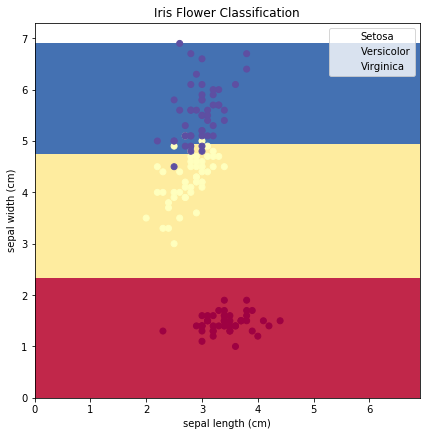

In [12]:
def plot_predictions(model):
    xx, yy = meshgrid(np.arange(0, max(X[:,1]), 0.001),
                      np.arange(0, max(X[:,1]), 0.001))
    
    npx=xx.ravel()
    npy=yy.ravel()
    
    sample_points = np.c_[npx, npy]
    
    sample_points_matrix = xgb.DMatrix(sample_points)
    Z = model.predict(sample_points_matrix)
    
    plt.figure(figsize=(max(X[:,1]),max(X[:,1])))
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap='Spectral', aplha=0.8)
    plt.scatter(X[:,0],X[:,1], c=y.astype(np.float), cmap='Spectral')
    
    plt.title('Iris Flower Classification')
    plt.xlabel(X1_name)
    plt.ylabel(X2_name)
    plt.legend(['Setosa','Versicolor','Virginica'])
    
    plt.show()
    
plot_predictions(bst)